# Logistic Regression


## Imports


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from util import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix ,f1_score
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
NUM_FOLDS = 10


In [4]:
model_name = "Logistic Regression"

## Reading the data


In [5]:
X, y = get_train_data(path='../data/train.csv')

In [6]:
# standardize the data
X = standardize_features(X)

In [7]:
X.columns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [20]:
# # variance threshold is the mean of the variance of all features
# feature_variance = X.var()
# print("Feature Variance: \n", feature_variance)
# # max variance
# mean_variance = feature_variance.mean()
# print("mean Variance: ", mean_variance)
# # scale your features to have zero mean and unit variance
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # You can also use variance thresholding to remove low-variance features
# selector = VarianceThreshold(threshold=np.ceil(mean_variance))
# X_selected = selector.fit_transform(X_scaled)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the model


In scikit-learn, `LogisticRegression` is a class that implements logistic regression for classification tasks. It has several parameters that control its behavior during training and prediction. Here are some of the most commonly used parameters:

1. **penalty**: Specifies the norm used in the penalization. It could be `'l1'` for L1 regularization, `'l2'` for L2 regularization, or `'none'` for no regularization. Default is `'l2'`, `'elasticnet'`: both L1 and L2 penalty terms are added.

2. **C**: Inverse of regularization strength; smaller values specify stronger regularization. Default is `1.0`.

3. **solver**: Algorithm to use in the optimization problem. It could be `'newton-cg'`, `'lbfgs'`, `'liblinear'`, `'sag'`, or `'saga'`. Default is `'lbfgs'`.

4. **max_iter**: Maximum number of iterations taken for the solvers to converge. Default is `100`.

5. **multi_class**: Strategy for handling multiple classes. It could be `'ovr'` (one-vs-rest) or `'multinomial'`. Default is `'ovr'`.

6. **random_state**: Seed used by the random number generator.

7. **tol**: Tolerance for stopping criteria.

8. **verbose**: Controls the verbosity.

9. **class_weight**: Weights associated with classes. Useful for imbalanced datasets.

10. **warm_start**: If set to `True`, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. Default is `False`.

These are some of the main parameters of `LogisticRegression`, but there are more. You can find a comprehensive list in the scikit-learn documentation for `LogisticRegression`.

In [22]:
lr = LogisticRegression(C=1, max_iter=10000,random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10000, random_state=42)

`cross_validate` function in scikit-learn is used for evaluating estimator performance using cross-validation. It takes several parameters to customize its behavior. Here are the main parameters:

1. **estimator**: This is the machine learning estimator (model) that you want to evaluate.

2. **X**: The feature matrix (data) to fit the model on.

3. **y**: The target values (labels) corresponding to X.

4. **cv**: The cross-validation strategy. It could be an integer specifying the number of folds in a KFold, a cross-validation splitter, or an iterable yielding train/test splits.

5. **scoring**: A single string or a callable to evaluate the predictions on the test set. For example, `'accuracy'`, `'precision'`, `'recall'`, `'f1'`, etc.

6. **n_jobs**: The number of CPU cores to use for computation. `-1` means using all processors.

7. **return_train_score**: Whether to include training scores in the output. Default is `False`.

8. **return_estimator**: Whether to return the fitted estimators for each split. Default is `False`.

9. **verbose**: Controls the verbosity: the higher, the more messages.

10. **fit_params**: Parameters to pass to the `fit` method of the estimator.

11. **pre_dispatch**: Controls the number of jobs dispatched during parallel execution. `-1` means all processes are dispatched at once, `2` means that two processes are dispatched, and `None` means that as many processes as CPUs are used.

These are the main parameters, but there are a few more which you can find in the scikit-learn documentation for the `cross_validate` function.

In [23]:
cv_results = cross_validate(lr, X_train, y_train, cv=NUM_FOLDS, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro', 'f1_weighted'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())

accuracy:  0.868125
f1_macro:  0.61502175443518
f1_micro:  0.868125


In [24]:
logistic_predictions = lr.predict(X_val)
print("Logistic Regression Predictions:", logistic_predictions)
logistic_accuracy = accuracy_score(y_val, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)

print("Classification Report:")
print(classification_report(y_val, logistic_predictions))

Logistic Regression Predictions: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Logistic Regression Accuracy: 0.8625
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0

## Model Analysis


### Feature Importance Plot

A feature importance plot shows the importance of each feature in the model. It can be used to identify the most important features and to understand the impact of each feature on the model's predictions.


In [25]:
# coefficient for each feature
lr.coef_.shape

(1, 200)

The weight of the coefficients in the logistic regression model can be used as a measure of feature importance. The higher the absolute value of the coefficient, the more important the feature is in the model. We can plot the coefficients to visualize the feature importance.
Notice that we take the absolute value of the coefficients to consider both positive and negative impacts of the features on the model's predictions.

     feature  importance
51    var_51        0.02
33    var_33        0.02
67    var_67        0.02
139  var_139        0.02
63    var_63        0.01
..       ...         ...
80    var_80        0.00
83    var_83        0.00
84    var_84        0.00
86    var_86        0.00
199  var_199        0.00

[200 rows x 2 columns]


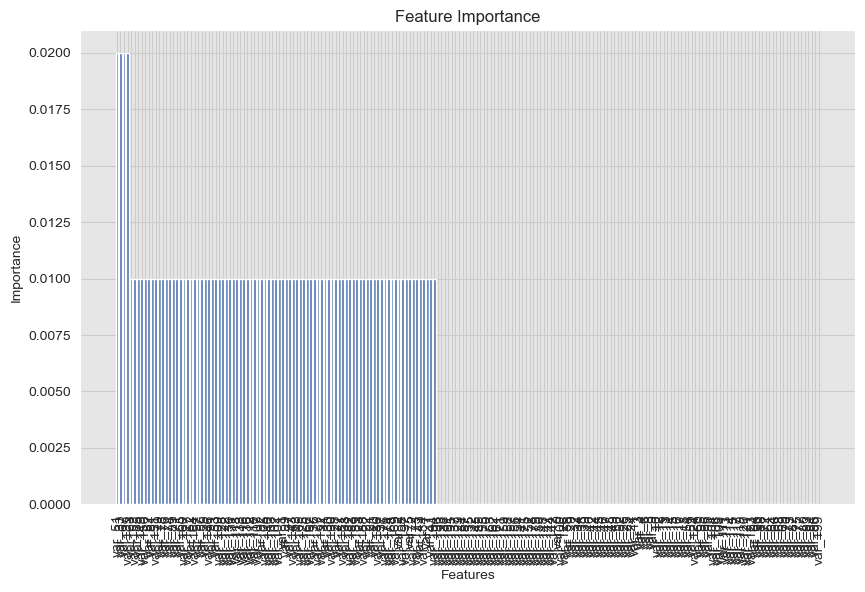

In [26]:
# Get the feature importance
importance = (abs(lr.coef_[0]) / np.abs(lr.coef_[0]).sum()).round(2)

feature_importance = get_feature_importance(
    features=X_train.columns, importance=importance)
print(feature_importance)

plt = get_feature_importance_plot(
    feature_importance, modelname='Logistic Regression',save=False)
plt.show()


Remove the unimportant feature

In [27]:
X_train_temp = X_train.copy()
X_val_temp = X_val.copy()

In [28]:
# loop over feature_importance and print out the features with importance > 0.1
for i in range(len(feature_importance)):
    if feature_importance['importance'][i] ==0:
        # remove the feature from the training data that has importance < 0.1
        X_train_temp = X_train_temp.drop(
            columns=feature_importance['feature'][i])
        X_val_temp = X_val_temp.drop(
            columns=feature_importance['feature'][i])
len(X_train_temp.columns)

91

In [29]:
lr_temp = LogisticRegression(C=1, max_iter=10000,random_state=42)
lr_temp.fit(X_train_temp, y_train)
cv_results = cross_validate(lr_temp, X_train_temp, y_train, cv=NUM_FOLDS, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro', 'f1_weighted'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())


accuracy:  0.9012500000000001
f1_macro:  0.6658755374151765
f1_micro:  0.9012500000000001


    feature  importance
0     var_1        0.02
12   var_33        0.02
40   var_99        0.02
36   var_91        0.02
59  var_139        0.02
..      ...         ...
29   var_76        0.01
27   var_71        0.01
90  var_198        0.01
81  var_183        0.00
28   var_74        0.00

[91 rows x 2 columns]


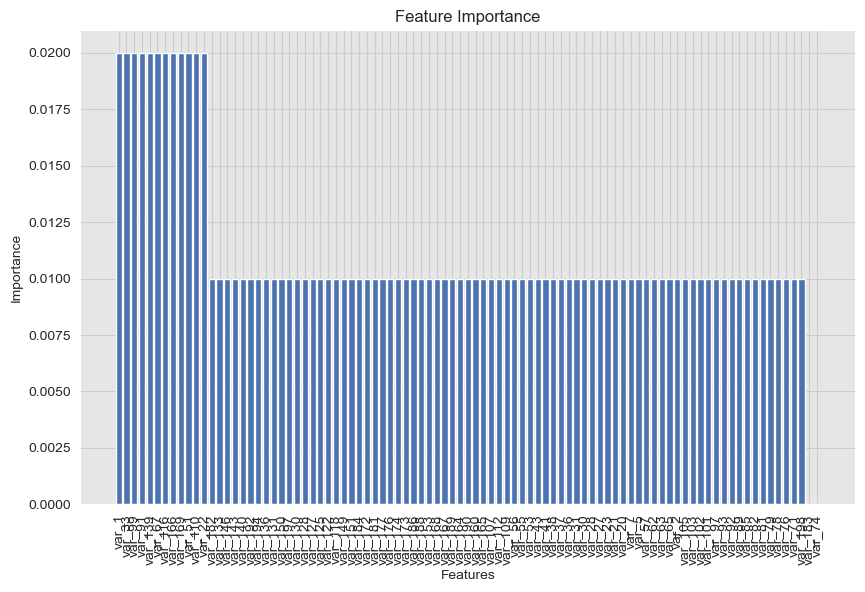

In [30]:
# Get the feature importance
importance = (abs(lr_temp.coef_[0]) / np.abs(lr_temp.coef_[0]).sum()).round(2)

feature_importance = get_feature_importance(
    features=X_train_temp.columns, importance=importance)
print(feature_importance)

plt = get_feature_importance_plot(
    feature_importance, modelname='Logistic Regression',save=False)
plt.show()


### Learning Curves Plot

show the training error (Ein) and validation error (Eval) as a function of the training set size

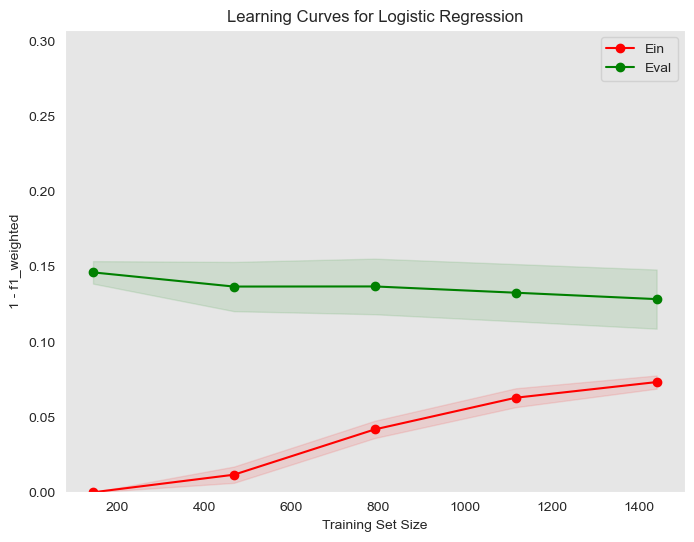

In [31]:
plt = get_learning_curve_plot(estimator=LogisticRegression(
    C=0.1, max_iter=10000, solver='saga'), X=X_train, y=y_train, cv=NUM_FOLDS, modelname='Logistic Regression')
plt.show()


### Partial Dependence Plot

A partial dependence plot shows the relationship between a feature and the model's predictions while holding all other features constant. It can be used to understand the impact of a single feature on the model's predictions i.e. PDPs show the average effect on predictions as the value of feature changes.

From the plots, we may see the type of the relationship between a feature and a prediction. Some relationships may look linear whereas other are more complex.


In [32]:
plt = get_partial_dependencies_plot(lr, X_train, modelname='Logistic Regression', save=True)
plt.show()


ValueError: Image size of 4500x120600 pixels is too large. It must be less than 2^16 in each direction.

### Hyperparameter Tuning

This is a process of adjusting the parameters of a model to optimize its performance. It can be done using techniques like grid search, random search, or Bayesian optimization.


In [23]:
# Define the parameter grid to search over
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'penalty': ['l1', 'l2'],
#     'solver': ['liblinear', 'saga']
# }
# Define the parameter grid
param_grid = {
    'C': [0.1, 0.5, 1, 5, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}


### Grid Search


In [25]:
# read the test data
X_test,y_test = get_test_data()

Best parameters found: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score found: 0.880492641511055
Test score with best parameters: 0.8518794544003705


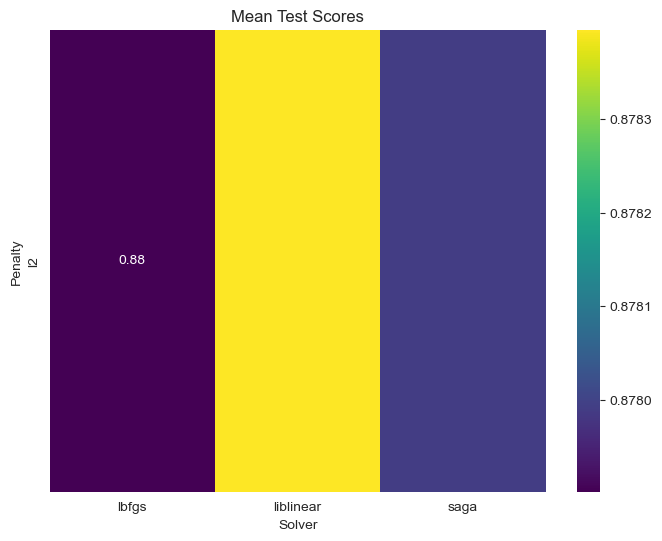

<Figure size 640x480 with 0 Axes>

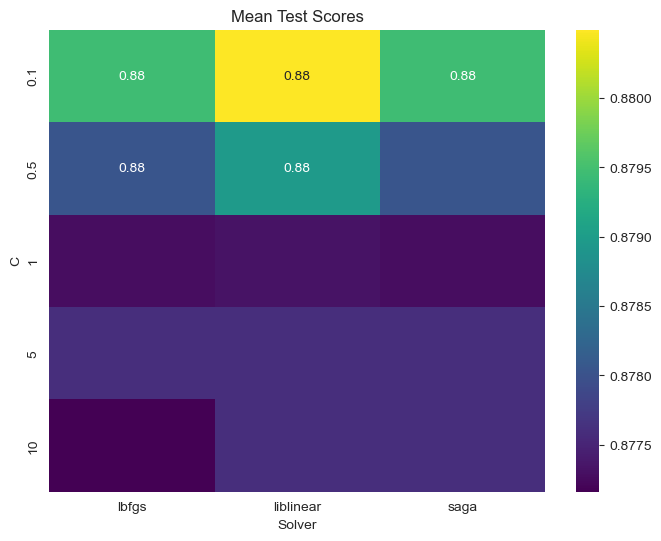

<Figure size 640x480 with 0 Axes>

In [26]:
grid_search = get_grid_search(estimator=LogisticRegression(random_state=42,
    max_iter=10000), param_grid=param_grid, X=X, y=y, cv=NUM_FOLDS, scoring='f1_weighted')
# Print the results
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)
print("Test score with best parameters:", grid_search.score(X_test, y_test))
# Get the results
results = grid_search.cv_results_
mean_test_scores = results['mean_test_score']

# Prepare the hyperparameter values for plotting
param_values_C = param_grid['C']
param_values_penalty = param_grid['penalty']
param_values_solver = param_grid['solver']

# Reshape the mean test scores for plotting
mean_test_scores = np.array(mean_test_scores).reshape(len(param_values_C), len(param_values_penalty), len(param_values_solver))

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap of mean test scores
sns.heatmap(mean_test_scores.mean(axis=0), annot=True, cmap='viridis', xticklabels=param_values_solver, yticklabels=param_values_penalty)

# Set labels and title
plt.xlabel('Solver')
plt.ylabel('Penalty')
plt.title('Mean Test Scores')

# Show the plot
plt.show()
# save the plot
plt.savefig(f'../images/{model_name}/mean_test_scores_1.png', dpi=300, bbox_inches='tight')
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap of mean test scores
sns.heatmap(mean_test_scores.mean(axis=1), annot=True, cmap='viridis', xticklabels=param_values_solver, yticklabels=param_values_C)

# Set labels and title
plt.xlabel('Solver')
plt.ylabel('C')
plt.title('Mean Test Scores')

# Show the plot
plt.show()
# save the plot
plt.savefig(f'../images/{model_name}/mean_test_scores_2.png', dpi=300, bbox_inches='tight')

accuracy:  0.8965
f1_macro:  0.6173521709836718
f1_micro:  0.8965
Accuracy Score of LogisticRegression(C=0.1, max_iter=10000, random_state=42, solver='liblinear') is: 0.8994797979797979


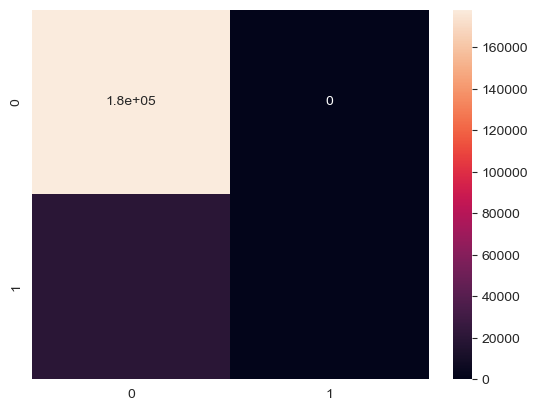

Classification Report of LogisticRegression(C=0.1, max_iter=10000, random_state=42, solver='liblinear') is: 
              precision    recall  f1-score   support

           0       0.90      1.00      0.95    178097
           1       0.00      0.00      0.00     19903

    accuracy                           0.90    198000
   macro avg       0.45      0.50      0.47    198000
weighted avg       0.81      0.90      0.85    198000

F1 Score of LogisticRegression(C=0.1, max_iter=10000, random_state=42, solver='liblinear') is: 0.8518794544003705


c:\Users\peter\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\peter\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\peter\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 640x480 with 0 Axes>

In [27]:
# best paramters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
model = LogisticRegression(solver='liblinear', max_iter=10000, random_state=42, penalty='l2', C=0.1)
# train the model
model.fit(X, y)
# validate the model
cv_results = cross_validate(model, X, y, cv=NUM_FOLDS, scoring=[
                            'f1_macro', 'accuracy', 'f1_micro', 'f1_weighted'])

print('accuracy: ', cv_results['test_accuracy'].mean())
print('f1_macro: ', cv_results['test_f1_macro'].mean())
print('f1_micro: ', cv_results['test_f1_micro'].mean())

# predict the validation set
y_pred = model.predict(X_test)

# Accuracy Score
print("Accuracy Score of " + str(model) + " is: " + str(accuracy_score(y_test, y_pred)))

# Confusion Matrix
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()
plt.show()
# save the plot
plt.savefig(f'../images/{model_name}/evaluation_confusion_matrix.png', dpi=300, bbox_inches='tight')
# Classification Report
print("Classification Report of " + str(model) + " is: \n" + str(classification_report(y_test, y_pred)))

# Weighted F1 Score
print("F1 Score of " + str(model) + " is: " + str(f1_score(y_test, y_pred, average='weighted')))
# # Perform cross-validation
# cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# # Calculate the mean training score
# mean_training_score = cv_scores.mean()
# print("Mean Training Score: {}".format(mean_training_score))

# # Calculate the mean cross-validation score
# mean_cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
# print("Mean Cross-Validation Score: {}".format(mean_cv_score))
# # Calculate the gap between mean training score and mean cross-validation score
# gap = mean_training_score - mean_cv_score

# print("Gap between mean training score and mean cross-validation score:", gap)
# print("------------------------------------------------------")

### Heatmap


<module 'matplotlib.pyplot' from 'c:\\Users\\peter\\miniconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

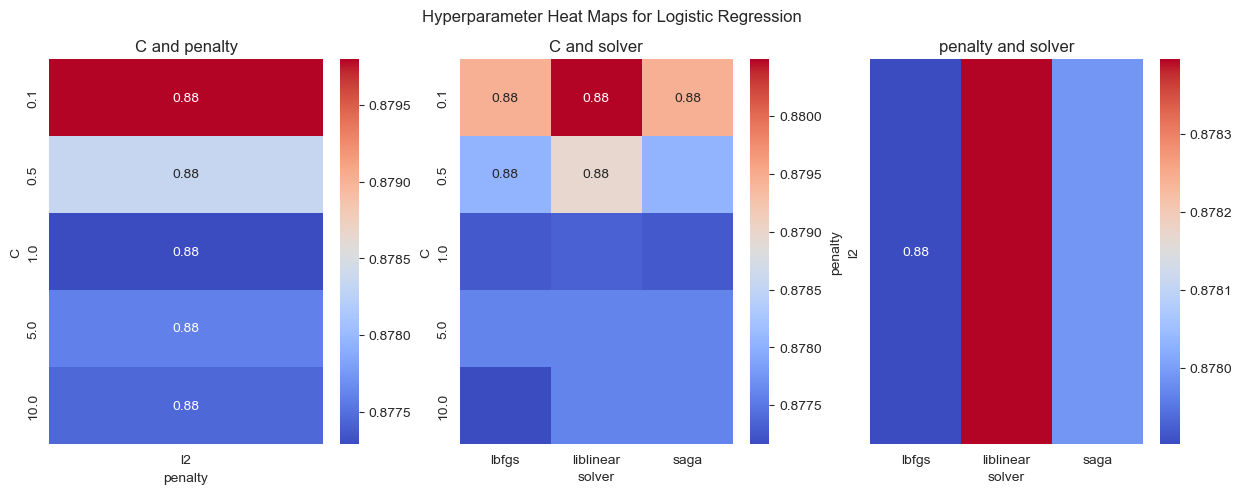

In [28]:
plot_hyper_param_heat_maps(param_grid, grid_search,modelname='Logistic Regression')


### Train-Validation Curve


Value [0.1, 0.5, 1, 5, 10]


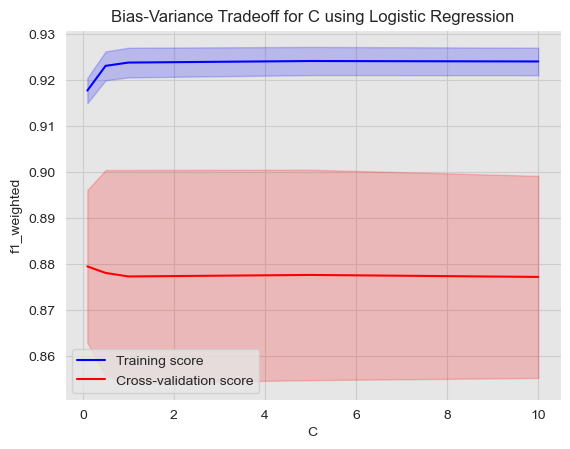

Value ['l2']


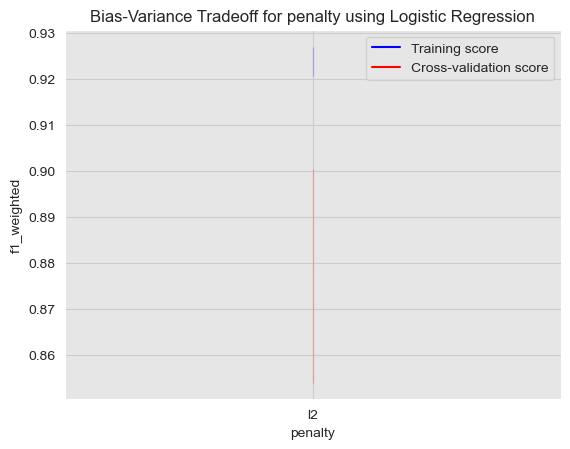

Value ['lbfgs', 'liblinear', 'saga']


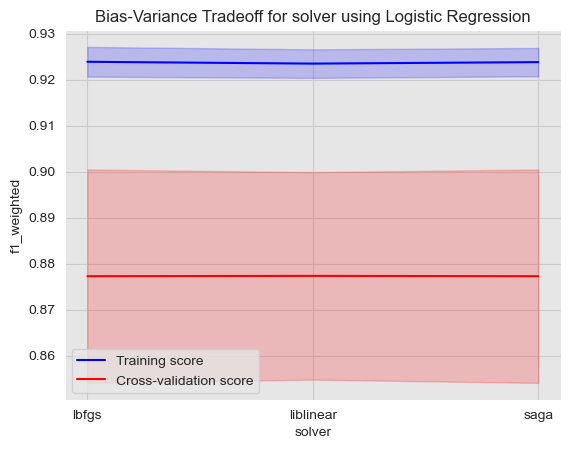

In [29]:
plot_hyper_param_train_validation_curve(estimator=LogisticRegression(
    max_iter=10000), param_grid=param_grid, X=X, y=y, cv=NUM_FOLDS, scoring='f1_weighted', modelname='Logistic Regression')


## Bias-Variance Analysis


In [30]:
# {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
lr = LogisticRegression(C=0.1,penalty='l2',solver='liblinear',random_state=42)
# lr = LogisticRegression(C=0.5, max_iter=10000, solver='lbfgs',penalty='l2',random_state=42)
mse, bias, var = get_bias_variance(
    lr, X_train=X, y_train=y, X_test=X_test, y_test=y_test)


In [31]:
print("mse: ", mse)
print("bias: ", bias)
print("var: ", var)
print("Estimated Eout: ",bias + var)


mse:  0.10051810606060607
bias:  0.10050289583333331
var:  1.5210227272727346e-05
Estimated Eout:  0.10051810606060604
